# Reporte: MS - "Data Mining & Processing"
### *Li Yang, Patiy*

Se presenta el código empleado para el procesamiento de los datos provistos para la diferenciación de dos muestras de pisco. Este código se encuentra publicado en un repositorio en Github, el cual puede accederse con este link o, alternativamente, puede ser visualizado en esta página web.

In [1039]:
import pandas as pd
data = pd.read_excel("https://github.com/Lab-Instrumental-2023-2/MS-DataMining-Processing/raw/main/Data.xlsx")
data = data.set_index(['Alignment ID'])
data

,Blank_11,Blank_12,Blank_21,Blank_22,Blank_31,Blank_Column,Alcanes_1,Alcanes_3,MM_Std_X1,MM_Std_X2,MM_X1,MM_X2,Italia_12,Italia_21,Italia_32,Quebranta_11,Quebranta_22
Alignment ID,,,,,,,,,,,,,,,,,
0,5.812149e-06,5.812149e-06,5.812149e-06,0.000006,5.812149e-06,5.812149e-06,0.001114,0.000389,0.000058,0.000094,3.734537e-04,5.241841e-04,0.001451,1.068961e-03,0.001129,0.000083,3.682379e-04
1,1.299572e-04,1.299572e-04,1.299572e-04,0.000130,1.299572e-04,4.532368e-02,0.000130,0.001300,0.000130,0.000130,1.299572e-04,1.299572e-04,0.000130,6.007807e-03,0.022183,0.000130,3.123167e-03
2,4.669645e-06,4.669645e-06,4.669645e-06,0.000005,4.669645e-06,4.669645e-06,0.000584,0.000648,0.000047,0.000073,3.439705e-03,4.173059e-03,0.017437,9.088211e-03,0.016529,0.000651,2.155563e-03
3,3.579123e-06,3.579123e-06,3.579123e-06,0.000004,3.579123e-06,3.579123e-06,0.000812,0.001726,0.000036,0.000058,4.740539e-03,5.432122e-03,0.033245,1.530614e-02,0.000726,0.000293,3.579123e-06
4,2.226109e-03,2.131481e-03,2.519395e-03,0.002461,2.192135e-03,8.887741e-04,0.000054,0.000073,0.000067,0.000095,1.006047e-02,1.050701e-02,0.065939,3.792160e-02,0.007081,0.000501,2.458184e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,3.920250e-07,3.920250e-07,3.920250e-07,0.004448,3.162425e-03,1.826925e-03,0.009431,0.000063,0.000004,0.000011,3.055530e-04,2.435014e-04,0.001776,3.920250e-07,0.000599,0.000582,4.289580e-04
75,3.530390e-07,3.530390e-07,3.530390e-07,0.002723,3.530390e-07,1.686392e-03,0.006788,0.000099,0.000004,0.000005,3.530390e-07,3.530390e-07,0.000825,3.530390e-07,0.000592,0.000322,3.530390e-07
76,6.317910e-03,8.377904e-03,6.968740e-03,0.003940,2.803058e-03,4.322329e-03,0.001578,0.000384,0.000019,0.000009,4.395675e-04,7.596660e-04,0.001964,1.615682e-03,0.002565,0.000533,9.862117e-04


# ANOVA

In [1040]:
# DataFrame con los blancos
blancos = data.iloc[:,range(0,6)]

# DataFrame con log10(blancos)
import numpy as np
log10blancos = blancos.apply(lambda x: np.log10(x)) 
nombres = {blanco:"log10("+str(blanco)+")" for blanco in blancos.columns}
log10blancos = log10blancos.rename(columns = nombres)

#log10blancos.insert(loc=0, column="Alignment ID", value=data.iloc[:,0])
log10blancos.iloc[:,range(0,5)]

,log10(Blank_11),log10(Blank_12),log10(Blank_21),log10(Blank_22),log10(Blank_31)
Alignment ID,,,,,
0,-5.235663,-5.235663,-5.235663,-5.235663,-5.235663
1,-3.886200,-3.886200,-3.886200,-3.886200,-3.886200
2,-5.330716,-5.330716,-5.330716,-5.330716,-5.330716
3,-5.446223,-5.446223,-5.446223,-5.446223,-5.446223
4,-2.652454,-2.671319,-2.598704,-2.608967,-2.659133
...,...,...,...,...,...
74,-6.406686,-6.406686,-6.406686,-2.351874,-2.499980
75,-6.452177,-6.452177,-6.452177,-2.565004,-6.452177
76,-2.199427,-2.076865,-2.156846,-2.404474,-2.552368


## a) ANOVA unidireccional en poblaciones de blancos
Se evaluaron cuatro ensayos con la condición de que cada uno debe contar con un mínimo de dos poblaciones con dos réplicas distintas.

#### a.1) Ensayo 1 
   - Población 1: log10(Blank_11) y log10(Blank_12)
   - Población 2: log10(Blank_21) y log10(Blank_22)
   - Población 3: log10(Blank_31)
   - Población 4: log10(Blank_Column)

#### a.2) Ensayo 2
   - Población 1: log10(Blank_11) y log10(Blank_12)
   - Población 2: log10(Blank_21) y log10(Blank_22)
   - Población 3: log10(Blank_31)

#### a.3) Ensayo 3 
   - Población 1: log10(Blank_11) y log10(Blank_12)
   - Población 2: log10(Blank_21) y log10(Blank_22)
   - Población 3: log10(Blank_Column)

#### a.4) Ensayo 4 
   - Población 1: log10(Blank_11) y log10(Blank_12)
   - Población 2: log10(Blank_21) y log10(Blank_22)

In [1041]:
#Ensayo 1
Anova_E1=log10blancos.transpose()
Anova_E1.insert(loc=0, column="Población", value=['P1','P1','P2','P2','P3','P4'])
Anova_E1

Alignment ID,Población,0,1,2,3,4,5,6,7,8,...,69,70,71,72,73,74,75,76,77,78
log10(Blank_11),P1,-5.235663,-3.886200,-5.330716,-5.446223,-2.652454,-1.693412,-6.45485,-3.800643,-5.071578,...,-1.691824,-2.494666,-1.871896,-2.480518,-1.448463,-6.406686,-6.452177,-2.199427,-6.441648,-2.379177
log10(Blank_12),P1,-5.235663,-3.886200,-5.330716,-5.446223,-2.671319,-1.904369,-6.45485,-3.800643,-5.071578,...,-1.686458,-2.497916,-1.839638,-2.321825,-1.468457,-6.406686,-6.452177,-2.076865,-6.441648,-2.380460
log10(Blank_21),P2,-5.235663,-3.886200,-5.330716,-5.446223,-2.598704,-1.712959,-6.45485,-3.800643,-5.071578,...,-1.723752,-2.506076,-1.761401,-2.446762,-1.515174,-6.406686,-6.452177,-2.156846,-6.441648,-2.463241
log10(Blank_22),P2,-5.235663,-3.886200,-5.330716,-5.446223,-2.608967,-1.516075,-6.45485,-3.800643,-5.071578,...,-1.681925,-2.559642,-1.797318,-2.294709,-1.579402,-2.351874,-2.565004,-2.404474,-2.592853,-2.556986
log10(Blank_31),P3,-5.235663,-3.886200,-5.330716,-5.446223,-2.659133,-1.062626,-6.45485,-3.800643,-5.071578,...,-1.731392,-2.509964,-2.011894,-2.475980,-1.549455,-2.499980,-6.452177,-2.552368,-2.560801,-2.368915
log10(Blank_Column),P4,-5.235663,-1.343675,-5.330716,-5.446223,-3.051209,-2.909880,-6.45485,-1.378085,-5.071578,...,-1.681565,-2.527773,-1.955786,-2.331934,-1.536139,-2.738279,-2.773041,-2.364282,-6.441648,-2.876356


In [1042]:
#Ensayo 2
Anova_E2=log10blancos.iloc[:,[0,1,2,3,4]].transpose()
Anova_E2.insert(loc=0, column="Población", value=['P1','P1','P2','P2','P3'])
Anova_E2

Alignment ID,Población,0,1,2,3,4,5,6,7,8,...,69,70,71,72,73,74,75,76,77,78
log10(Blank_11),P1,-5.235663,-3.8862,-5.330716,-5.446223,-2.652454,-1.693412,-6.45485,-3.800643,-5.071578,...,-1.691824,-2.494666,-1.871896,-2.480518,-1.448463,-6.406686,-6.452177,-2.199427,-6.441648,-2.379177
log10(Blank_12),P1,-5.235663,-3.8862,-5.330716,-5.446223,-2.671319,-1.904369,-6.45485,-3.800643,-5.071578,...,-1.686458,-2.497916,-1.839638,-2.321825,-1.468457,-6.406686,-6.452177,-2.076865,-6.441648,-2.380460
log10(Blank_21),P2,-5.235663,-3.8862,-5.330716,-5.446223,-2.598704,-1.712959,-6.45485,-3.800643,-5.071578,...,-1.723752,-2.506076,-1.761401,-2.446762,-1.515174,-6.406686,-6.452177,-2.156846,-6.441648,-2.463241
log10(Blank_22),P2,-5.235663,-3.8862,-5.330716,-5.446223,-2.608967,-1.516075,-6.45485,-3.800643,-5.071578,...,-1.681925,-2.559642,-1.797318,-2.294709,-1.579402,-2.351874,-2.565004,-2.404474,-2.592853,-2.556986
log10(Blank_31),P3,-5.235663,-3.8862,-5.330716,-5.446223,-2.659133,-1.062626,-6.45485,-3.800643,-5.071578,...,-1.731392,-2.509964,-2.011894,-2.475980,-1.549455,-2.499980,-6.452177,-2.552368,-2.560801,-2.368915


In [1043]:
#Ensayo 3
Anova_E3=log10blancos.iloc[:,[0,1,2,3,5]].transpose()
Anova_E3.insert(loc=0, column="Población", value=['P1','P1','P2','P2','P3'])
Anova_E3

Alignment ID,Población,0,1,2,3,4,5,6,7,8,...,69,70,71,72,73,74,75,76,77,78
log10(Blank_11),P1,-5.235663,-3.886200,-5.330716,-5.446223,-2.652454,-1.693412,-6.45485,-3.800643,-5.071578,...,-1.691824,-2.494666,-1.871896,-2.480518,-1.448463,-6.406686,-6.452177,-2.199427,-6.441648,-2.379177
log10(Blank_12),P1,-5.235663,-3.886200,-5.330716,-5.446223,-2.671319,-1.904369,-6.45485,-3.800643,-5.071578,...,-1.686458,-2.497916,-1.839638,-2.321825,-1.468457,-6.406686,-6.452177,-2.076865,-6.441648,-2.380460
log10(Blank_21),P2,-5.235663,-3.886200,-5.330716,-5.446223,-2.598704,-1.712959,-6.45485,-3.800643,-5.071578,...,-1.723752,-2.506076,-1.761401,-2.446762,-1.515174,-6.406686,-6.452177,-2.156846,-6.441648,-2.463241
log10(Blank_22),P2,-5.235663,-3.886200,-5.330716,-5.446223,-2.608967,-1.516075,-6.45485,-3.800643,-5.071578,...,-1.681925,-2.559642,-1.797318,-2.294709,-1.579402,-2.351874,-2.565004,-2.404474,-2.592853,-2.556986
log10(Blank_Column),P3,-5.235663,-1.343675,-5.330716,-5.446223,-3.051209,-2.909880,-6.45485,-1.378085,-5.071578,...,-1.681565,-2.527773,-1.955786,-2.331934,-1.536139,-2.738279,-2.773041,-2.364282,-6.441648,-2.876356


In [1044]:
#Ensayo 4
Anova_E4=log10blancos.iloc[:,[0,1,2,3]].transpose()
Anova_E4.insert(loc=0, column="Población", value=['P1','P1','P2','P2'])
Anova_E4

Alignment ID,Población,0,1,2,3,4,5,6,7,8,...,69,70,71,72,73,74,75,76,77,78
log10(Blank_11),P1,-5.235663,-3.8862,-5.330716,-5.446223,-2.652454,-1.693412,-6.45485,-3.800643,-5.071578,...,-1.691824,-2.494666,-1.871896,-2.480518,-1.448463,-6.406686,-6.452177,-2.199427,-6.441648,-2.379177
log10(Blank_12),P1,-5.235663,-3.8862,-5.330716,-5.446223,-2.671319,-1.904369,-6.45485,-3.800643,-5.071578,...,-1.686458,-2.497916,-1.839638,-2.321825,-1.468457,-6.406686,-6.452177,-2.076865,-6.441648,-2.380460
log10(Blank_21),P2,-5.235663,-3.8862,-5.330716,-5.446223,-2.598704,-1.712959,-6.45485,-3.800643,-5.071578,...,-1.723752,-2.506076,-1.761401,-2.446762,-1.515174,-6.406686,-6.452177,-2.156846,-6.441648,-2.463241
log10(Blank_22),P2,-5.235663,-3.8862,-5.330716,-5.446223,-2.608967,-1.516075,-6.45485,-3.800643,-5.071578,...,-1.681925,-2.559642,-1.797318,-2.294709,-1.579402,-2.351874,-2.565004,-2.404474,-2.592853,-2.556986


In [1045]:
import pingouin as pg

def aov(x,Ensayo):
    try:
        aov = pg.anova(dv=x, between='Población', data=Ensayo, detailed=True)
        return float(aov['p-unc'][0])
    except:
        return'NaN'
    
a = list(aov(x,Anova_E1) for x in range(0,79))
b = list(aov(x,Anova_E2) for x in range(0,79))
c = list(aov(x,Anova_E3) for x in range(0,79))
d = list(aov(x,Anova_E4) for x in range(0,79))

p_values = {'p_values(E1)':a,'p_values(E2)':b,'p_values(E3)':c,'p_values(E4)':d}
p_values  = pd.DataFrame(p_values);

p_values['p_values(E1)']=p_values['p_values(E1)'].astype(float)
p_values['p_values(E2)']=p_values['p_values(E2)'].astype(float)
p_values['p_values(E3)']=p_values['p_values(E3)'].astype(float)
p_values['p_values(E4)']=p_values['p_values(E4)'].astype(float);

C:\Users\Patiy Li Yang\anaconda3\envs\Ciencia_de_datos_espaciales\Lib\site-packages\pingouin\parametric.py:1006: RuntimeWarning: invalid value encountered in scalar divide
  fval = msbetween / mserror
C:\Users\Patiy Li Yang\anaconda3\envs\Ciencia_de_datos_espaciales\Lib\site-packages\pingouin\parametric.py:1012: RuntimeWarning: invalid value encountered in scalar divide
  np2 = ssbetween / (ssbetween + sserror)  # = ssbetween / sstotal
C:\Users\Patiy Li Yang\anaconda3\envs\Ciencia_de_datos_espaciales\Lib\site-packages\pingouin\parametric.py:1006: RuntimeWarning: divide by zero encountered in scalar divide
  fval = msbetween / mserror
C:\Users\Patiy Li Yang\anaconda3\envs\Ciencia_de_datos_espaciales\Lib\site-packages\pingouin\parametric.py:1006: RuntimeWarning: divide by zero encountered in scalar divide
  fval = msbetween / mserror
C:\Users\Patiy Li Yang\anaconda3\envs\Ciencia_de_datos_espaciales\Lib\site-packages\pingouin\parametric.py:1006: RuntimeWarning: invalid value encountered i

C:\Users\Patiy Li Yang\anaconda3\envs\Ciencia_de_datos_espaciales\Lib\site-packages\pingouin\parametric.py:1006: RuntimeWarning: invalid value encountered in scalar divide
  fval = msbetween / mserror
C:\Users\Patiy Li Yang\anaconda3\envs\Ciencia_de_datos_espaciales\Lib\site-packages\pingouin\parametric.py:1012: RuntimeWarning: invalid value encountered in scalar divide
  np2 = ssbetween / (ssbetween + sserror)  # = ssbetween / sstotal
C:\Users\Patiy Li Yang\anaconda3\envs\Ciencia_de_datos_espaciales\Lib\site-packages\pingouin\parametric.py:1006: RuntimeWarning: invalid value encountered in scalar divide
  fval = msbetween / mserror
C:\Users\Patiy Li Yang\anaconda3\envs\Ciencia_de_datos_espaciales\Lib\site-packages\pingouin\parametric.py:1012: RuntimeWarning: invalid value encountered in scalar divide
  np2 = ssbetween / (ssbetween + sserror)  # = ssbetween / sstotal
C:\Users\Patiy Li Yang\anaconda3\envs\Ciencia_de_datos_espaciales\Lib\site-packages\pingouin\parametric.py:1006: Runtime

C:\Users\Patiy Li Yang\anaconda3\envs\Ciencia_de_datos_espaciales\Lib\site-packages\pingouin\parametric.py:1006: RuntimeWarning: invalid value encountered in scalar divide
  fval = msbetween / mserror
C:\Users\Patiy Li Yang\anaconda3\envs\Ciencia_de_datos_espaciales\Lib\site-packages\pingouin\parametric.py:1012: RuntimeWarning: invalid value encountered in scalar divide
  np2 = ssbetween / (ssbetween + sserror)  # = ssbetween / sstotal
C:\Users\Patiy Li Yang\anaconda3\envs\Ciencia_de_datos_espaciales\Lib\site-packages\pingouin\parametric.py:1006: RuntimeWarning: invalid value encountered in scalar divide
  fval = msbetween / mserror
C:\Users\Patiy Li Yang\anaconda3\envs\Ciencia_de_datos_espaciales\Lib\site-packages\pingouin\parametric.py:1012: RuntimeWarning: invalid value encountered in scalar divide
  np2 = ssbetween / (ssbetween + sserror)  # = ssbetween / sstotal
C:\Users\Patiy Li Yang\anaconda3\envs\Ciencia_de_datos_espaciales\Lib\site-packages\pingouin\parametric.py:1006: Runtime

C:\Users\Patiy Li Yang\anaconda3\envs\Ciencia_de_datos_espaciales\Lib\site-packages\pingouin\parametric.py:1006: RuntimeWarning: invalid value encountered in scalar divide
  fval = msbetween / mserror
C:\Users\Patiy Li Yang\anaconda3\envs\Ciencia_de_datos_espaciales\Lib\site-packages\pingouin\parametric.py:1012: RuntimeWarning: invalid value encountered in scalar divide
  np2 = ssbetween / (ssbetween + sserror)  # = ssbetween / sstotal
C:\Users\Patiy Li Yang\anaconda3\envs\Ciencia_de_datos_espaciales\Lib\site-packages\pingouin\parametric.py:1006: RuntimeWarning: invalid value encountered in scalar divide
  fval = msbetween / mserror
C:\Users\Patiy Li Yang\anaconda3\envs\Ciencia_de_datos_espaciales\Lib\site-packages\pingouin\parametric.py:1012: RuntimeWarning: invalid value encountered in scalar divide
  np2 = ssbetween / (ssbetween + sserror)  # = ssbetween / sstotal
C:\Users\Patiy Li Yang\anaconda3\envs\Ciencia_de_datos_espaciales\Lib\site-packages\pingouin\parametric.py:1006: Runtime

C:\Users\Patiy Li Yang\anaconda3\envs\Ciencia_de_datos_espaciales\Lib\site-packages\pingouin\parametric.py:1006: RuntimeWarning: invalid value encountered in scalar divide
  fval = msbetween / mserror
C:\Users\Patiy Li Yang\anaconda3\envs\Ciencia_de_datos_espaciales\Lib\site-packages\pingouin\parametric.py:1012: RuntimeWarning: invalid value encountered in scalar divide
  np2 = ssbetween / (ssbetween + sserror)  # = ssbetween / sstotal
C:\Users\Patiy Li Yang\anaconda3\envs\Ciencia_de_datos_espaciales\Lib\site-packages\pingouin\parametric.py:1006: RuntimeWarning: invalid value encountered in scalar divide
  fval = msbetween / mserror
C:\Users\Patiy Li Yang\anaconda3\envs\Ciencia_de_datos_espaciales\Lib\site-packages\pingouin\parametric.py:1012: RuntimeWarning: invalid value encountered in scalar divide
  np2 = ssbetween / (ssbetween + sserror)  # = ssbetween / sstotal
C:\Users\Patiy Li Yang\anaconda3\envs\Ciencia_de_datos_espaciales\Lib\site-packages\pingouin\parametric.py:1006: Runtime

In [1046]:
#Dataframe con los p_values de cada ensayo
p_values

,p_values(E1),p_values(E2),p_values(E3),p_values(E4)
0,NaN,NaN,NaN,NaN
1,0.000000,0.000000,0.000000,NaN
2,0.000000,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,0.002363,0.055533,0.001606,0.032555
...,...,...,...,...
74,0.492137,0.432064,0.457494,0.422650
75,0.529953,0.625000,0.439341,0.422650
76,0.337959,0.250166,0.491439,0.410680
77,0.502198,0.413206,0.625000,0.422650


In [1047]:
p_val_num={'E1' : len(p_values[p_values['p_values(E1)'] < 0.05]),
 'E2' : len(p_values[p_values['p_values(E2)'] < 0.05]),
 'E3' : len(p_values[p_values['p_values(E3)'] < 0.05]),
 'E4' : len(p_values[p_values['p_values(E4)'] < 0.05])}

# Número de señales con p_values < 0.05 por ensayo
p_val_num

{'E1': 36, 'E2': 19, 'E3': 17, 'E4': 8}

In [1129]:
# Porcentaje de señales con p_values < 0.05 por ensayo
p_val_per={'E1' : 100*len(p_values[p_values['p_values(E1)'] < 0.05])/79,
 'E2' : 100*len(p_values[p_values['p_values(E2)'] < 0.05])/79,
 'E3' : 100*len(p_values[p_values['p_values(E3)'] < 0.05])/79,
 'E4' : 100*len(p_values[p_values['p_values(E4)'] < 0.05])/79}

p_val_per

{'E1': 45.56962025316456,
 'E2': 24.050632911392405,
 'E3': 21.518987341772153,
 'E4': 10.126582278481013}

A partir de los resultados obtenidos, se consideró como blancos significativos aquellos tomados por los grupos 1 y 2 (Blank_11, Blank_12, Blank_21 y Blank_22)

In [1049]:
#Dataframe con los blancos significativos
blancos_sig = blancos.iloc[:,range(0,4)]

blancos_sig['Promedio'] = blancos_sig.mean(axis=1)
blancos_sig['Desviación_estándar'] = blancos_sig.std(axis=1);

C:\Users\Patiy Li Yang\AppData\Local\Temp\ipykernel_17620\2785632269.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blancos_sig['Promedio'] = blancos_sig.mean(axis=1)


In [1050]:
blancos_sig

,Blank_11,Blank_12,Blank_21,Blank_22,Promedio,Desviación_estándar
Alignment ID,,,,,,
0,5.812149e-06,5.812149e-06,5.812149e-06,0.000006,0.000006,0.000000
1,1.299572e-04,1.299572e-04,1.299572e-04,0.000130,0.000130,0.000000
2,4.669645e-06,4.669645e-06,4.669645e-06,0.000005,0.000005,0.000000
3,3.579123e-06,3.579123e-06,3.579123e-06,0.000004,0.000004,0.000000
4,2.226109e-03,2.131481e-03,2.519395e-03,0.002461,0.002334,0.000161
...,...,...,...,...,...,...
74,3.920250e-07,3.920250e-07,3.920250e-07,0.004448,0.001112,0.001926
75,3.530390e-07,3.530390e-07,3.530390e-07,0.002723,0.000681,0.001179
76,6.317910e-03,8.377904e-03,6.968740e-03,0.003940,0.006401,0.001604


In [1051]:
# Resta de los datos menos el promedio de los blancos considerados significativos
data_blank_subst = data.iloc[:,range(6,17)]
data_blank_subst.sub(blancos_sig['Promedio'], axis=0)

,Alcanes_1,Alcanes_3,MM_Std_X1,MM_Std_X2,MM_X1,MM_X2,Italia_12,Italia_21,Italia_32,Quebranta_11,Quebranta_22
Alignment ID,,,,,,,,,,,
0,0.001109,0.000383,0.000052,0.000088,0.000368,0.000518,0.001445,0.001063,0.001124,0.000078,0.000362
1,0.000000,0.001170,0.000000,0.000000,0.000000,0.000000,0.000000,0.005878,0.022053,0.000000,0.002993
2,0.000579,0.000643,0.000042,0.000069,0.003435,0.004168,0.017433,0.009084,0.016524,0.000646,0.002151
3,0.000809,0.001722,0.000032,0.000055,0.004737,0.005429,0.033242,0.015303,0.000722,0.000289,0.000000
4,-0.002280,-0.002261,-0.002268,-0.002239,0.007726,0.008173,0.063604,0.035587,0.004747,-0.001833,-0.002089
...,...,...,...,...,...,...,...,...,...,...,...
74,0.008318,-0.001049,-0.001108,-0.001101,-0.000807,-0.000869,0.000664,-0.001112,-0.000513,-0.000530,-0.000683
75,0.006107,-0.000582,-0.000677,-0.000676,-0.000681,-0.000681,0.000144,-0.000681,-0.000089,-0.000359,-0.000681
76,-0.004824,-0.006017,-0.006383,-0.006392,-0.005962,-0.005642,-0.004437,-0.004786,-0.003836,-0.005868,-0.005415


**Señales significativas** : Solo se conservarán aquellas señales mostradas en la tabla anterior que sean mayores a  tres veces la desviación de los blancos significatos

In [1052]:
data_sig['Alcanes_1']=data_blank_subst[data_blank_subst['Alcanes_1']> 3*blancos_sig['Desviación_estándar'][0:79]]['Alcanes_1']
data_sig['Alcanes_3']=data_blank_subst[data_blank_subst['Alcanes_3']> 3*blancos_sig['Desviación_estándar'][0:79]]['Alcanes_3']

data_sig['MM_Std_X1']=data_blank_subst[data_blank_subst['MM_Std_X1']> 3*blancos_sig['Desviación_estándar'][0:79]]['MM_Std_X1']
data_sig['MM_Std_X2']=data_blank_subst[data_blank_subst['MM_Std_X2']> 3*blancos_sig['Desviación_estándar'][0:79]]['MM_Std_X2']

data_sig['MM_X1']=data_blank_subst[data_blank_subst['MM_X1']> 3*blancos_sig['Desviación_estándar'][0:79]]['MM_X1']
data_sig['MM_X2']=data_blank_subst[data_blank_subst['MM_X2']> 3*blancos_sig['Desviación_estándar'][0:79]]['MM_X2']

data_sig['Italia_12']=data_blank_subst[data_blank_subst['Italia_12']> 3*blancos_sig['Desviación_estándar'][0:79]]['Italia_12']
data_sig['Italia_21']=data_blank_subst[data_blank_subst['Italia_21']> 3*blancos_sig['Desviación_estándar'][0:79]]['Italia_21']
data_sig['Italia_32']=data_blank_subst[data_blank_subst['Italia_32']> 3*blancos_sig['Desviación_estándar'][0:79]]['Italia_32']

data_sig['Quebranta_11']=data_blank_subst[data_blank_subst['Quebranta_11']> 3*blancos_sig['Desviación_estándar'][0:79]]['Quebranta_11']
data_sig['Quebranta_22']=data_blank_subst[data_blank_subst['Quebranta_22']> 3*blancos_sig['Desviación_estándar'][0:79]]['Quebranta_22']

In [1105]:
#DataFrame con las señales significativas de cada muestra
data_sig = data_sig[['MM_Std_X1','MM_Std_X2','MM_X1','MM_X2','Italia_12','Italia_21','Italia_32','Quebranta_11','Quebranta_22']]
data_sig

,MM_Std_X1,MM_Std_X2,MM_X1,MM_X2,Italia_12,Italia_21,Italia_32,Quebranta_11,Quebranta_22
Alignment ID,,,,,,,,,
0,0.000058,0.000094,3.734537e-04,5.241841e-04,1.450965e-03,1.068961e-03,1.129389e-03,8.343121e-05,3.682379e-04
1,0.000130,0.000130,1.299572e-04,1.299572e-04,1.299572e-04,6.007807e-03,2.218254e-02,1.299572e-04,3.123167e-03
2,0.000047,0.000073,3.439705e-03,4.173059e-03,1.743730e-02,9.088211e-03,1.652855e-02,6.507119e-04,2.155563e-03
3,0.000036,0.000058,4.740539e-03,5.432122e-03,3.324510e-02,1.530614e-02,7.259100e-04,2.930393e-04,3.579123e-06
6,0.000004,0.000011,3.508732e-07,3.508732e-07,3.508732e-07,3.508732e-07,6.836239e-04,3.508732e-07,3.508732e-07
7,0.000158,0.000158,1.582549e-04,1.582549e-04,1.582549e-04,7.121648e-03,2.308288e-02,1.582549e-04,3.306306e-03
8,0.000085,0.000096,2.951892e-03,4.897731e-03,8.562054e-03,3.021243e-03,2.212968e-02,6.375792e-04,1.900930e-03
11,0.000011,0.000010,9.831753e-07,9.831753e-07,9.831753e-07,9.831753e-07,9.831753e-07,9.831753e-07,9.831753e-07
12,0.000218,0.000562,3.386993e-03,2.642792e-03,8.410755e-03,4.408445e-03,6.670619e-03,5.585256e-04,8.304940e-04


**Observación**: Todas las señales identificadas en la mezcla de los estándares (MM_Std) obtenidas con ambos SPMEs presentan las mismas señales y lo mismo se observa para las mezclas de las muestras (MM).Sin embargo, también se observan ciertas señales en las muestras Italia_21, Italia_32 y Quebranta_22 que no se encuentran en las mezclas de las muestras. Dichas señales serán filtradas.

In [1106]:
#Se están manteniendo solo las filas que contengan tanto valores en las muestras como en los estándares
data_sig['Italia_12']=data_sig[data_sig['Italia_12']*0 == data_sig['MM_X1'][0:79]*0]['Italia_12']
data_sig['Italia_21']=data_sig[data_sig['Italia_21']*0 == data_sig['MM_X1'][0:79]*0]['Italia_21']
data_sig['Italia_32']=data_sig[data_sig['Italia_32']*0 == data_sig['MM_X1'][0:79]*0]['Italia_32']
data_sig['Quebranta_22']=data_sig[data_sig['Quebranta_22']*0 == data_sig['MM_X1'][0:79]*0]['Quebranta_22']


#Resultado:
data_sig

,MM_Std_X1,MM_Std_X2,MM_X1,MM_X2,Italia_12,Italia_21,Italia_32,Quebranta_11,Quebranta_22
Alignment ID,,,,,,,,,
0,0.000058,0.000094,3.734537e-04,5.241841e-04,1.450965e-03,1.068961e-03,1.129389e-03,8.343121e-05,3.682379e-04
1,0.000130,0.000130,1.299572e-04,1.299572e-04,1.299572e-04,6.007807e-03,2.218254e-02,1.299572e-04,3.123167e-03
2,0.000047,0.000073,3.439705e-03,4.173059e-03,1.743730e-02,9.088211e-03,1.652855e-02,6.507119e-04,2.155563e-03
3,0.000036,0.000058,4.740539e-03,5.432122e-03,3.324510e-02,1.530614e-02,7.259100e-04,2.930393e-04,3.579123e-06
6,0.000004,0.000011,3.508732e-07,3.508732e-07,3.508732e-07,3.508732e-07,6.836239e-04,3.508732e-07,3.508732e-07
7,0.000158,0.000158,1.582549e-04,1.582549e-04,1.582549e-04,7.121648e-03,2.308288e-02,1.582549e-04,3.306306e-03
8,0.000085,0.000096,2.951892e-03,4.897731e-03,8.562054e-03,3.021243e-03,2.212968e-02,6.375792e-04,1.900930e-03
11,0.000011,0.000010,9.831753e-07,9.831753e-07,9.831753e-07,9.831753e-07,9.831753e-07,9.831753e-07,9.831753e-07
12,0.000218,0.000562,3.386993e-03,2.642792e-03,8.410755e-03,4.408445e-03,6.670619e-03,5.585256e-04,8.304940e-04


# t-test: Evaluación de reproducibilidad

In [1055]:
log10datos = data_sig.apply(lambda x: np.log10(x)) 
nombres = {col:"log10("+str(col)+")" for col in data_sig.columns}
log10datos = log10datos.rename(columns = nombres)
log10datos

# Test para datos independientes (p-value, intervalos de confianza)
# ==============================================================================
pg.ttest(x=data_sig.loc[:,'MM_Std_X1'], y=data_sig.loc[:,'MM_Std_X2'], alternative='two-sided', correction=False)
pg.ttest(x=data_sig.loc[:,'MM_X1'], y=data_sig.loc[:,'MM_X2'], alternative='two-sided', correction=False)

pg.ttest(x=data_sig.loc[:,'Italia_12'], y=data_sig.loc[:,'Italia_32'], alternative='two-sided', correction=False)
pg.ttest(x=data_sig.loc[:,'Italia_12'], y=data_sig.loc[:,'Italia_21'], alternative='two-sided', correction=False)
pg.ttest(x=data_sig.loc[:,'Italia_32'], y=data_sig.loc[:,'Italia_21'], alternative='two-sided', correction=False)

pg.ttest(x=data_sig.loc[:,'Quebranta_11'], y=data_sig.loc[:,'Quebranta_22'], alternative='two-sided', correction=False)
#pg.ttest(x=data.loc[:,'Italia_32'], y=data.loc[:,'Italia_21'], alternative='two-sided', correction=False)

#===========================================================================================

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.173031,70,two-sided,0.863126,"[-0.04, 0.05]",0.040784,0.246,0.053343


In [1056]:
data_sig2 = data_sig.drop(columns={'Italia_32'})
data_sig2 = data_sig2.dropna()
data_sig2

,MM_Std_X1,MM_Std_X2,MM_X1,MM_X2,Italia_12,Italia_21,Quebranta_11,Quebranta_22
Alignment ID,,,,,,,,
0,0.000058,0.000094,3.734537e-04,5.241841e-04,1.450965e-03,1.068961e-03,8.343121e-05,3.682379e-04
1,0.000130,0.000130,1.299572e-04,1.299572e-04,1.299572e-04,6.007807e-03,1.299572e-04,3.123167e-03
2,0.000047,0.000073,3.439705e-03,4.173059e-03,1.743730e-02,9.088211e-03,6.507119e-04,2.155563e-03
3,0.000036,0.000058,4.740539e-03,5.432122e-03,3.324510e-02,1.530614e-02,2.930393e-04,3.579123e-06
6,0.000004,0.000011,3.508732e-07,3.508732e-07,3.508732e-07,3.508732e-07,3.508732e-07,3.508732e-07
7,0.000158,0.000158,1.582549e-04,1.582549e-04,1.582549e-04,7.121648e-03,1.582549e-04,3.306306e-03
8,0.000085,0.000096,2.951892e-03,4.897731e-03,8.562054e-03,3.021243e-03,6.375792e-04,1.900930e-03
11,0.000011,0.000010,9.831753e-07,9.831753e-07,9.831753e-07,9.831753e-07,9.831753e-07,9.831753e-07
12,0.000218,0.000562,3.386993e-03,2.642792e-03,8.410755e-03,4.408445e-03,5.585256e-04,8.304940e-04


# ANOVA: Señales propias de cada pisco

In [1112]:
log10datos_anova = data_sig2.iloc[:,range(2,8)].apply(lambda x: np.log10(x)) 
nombres = {col:"log10("+str(col)+")" for col in log10datos_anova.columns}
log10datos_anova = log10datos_anova.rename(columns = nombres)

log10datos_anova

,log10(MM_X1),log10(MM_X2),log10(Italia_12),log10(Italia_21),log10(Quebranta_11),log10(Quebranta_22)
Alignment ID,,,,,,
0,-3.427763,-3.280516,-2.838343,-2.971038,-4.078671,-3.433872
1,-3.886200,-3.886200,-3.886200,-2.221284,-3.886200,-2.505405
2,-2.463479,-2.379545,-1.758521,-2.041522,-3.186611,-2.666439
3,-2.324172,-2.265030,-1.478272,-1.815134,-3.533074,-5.446223
6,-6.454850,-6.454850,-6.454850,-6.454850,-6.454850,-6.454850
7,-3.800643,-3.800643,-3.800643,-2.147419,-3.800643,-2.480657
8,-2.529900,-2.310005,-2.067422,-2.519814,-3.195466,-2.721034
11,-6.007369,-6.007369,-6.007369,-6.007369,-6.007369,-6.007369
12,-2.470186,-2.577937,-2.075165,-2.355715,-3.252957,-3.080664


In [1115]:
#Ensayo 1: MM e Italia
Anova_datos_E1=log10datos_anova.iloc[:,range(0,4)].transpose()
Anova_datos_E1.insert(loc=0, column="Población", value=['P1','P1','P2','P2'])
Anova_datos_E1

Alignment ID,Población,0,1,2,3,6,7,8,11,12,...,39,40,41,42,43,44,47,50,52,56
log10(MM_X1),P1,-3.427763,-3.886200,-2.463479,-2.324172,-6.45485,-3.800643,-2.529900,-6.007369,-2.470186,...,-3.381487,-3.525193,-3.337976,-3.487838,-3.490231,-5.940499,-6.180065,-4.502000,-4.378630,-5.075999
log10(MM_X2),P1,-3.280516,-3.886200,-2.379545,-2.265030,-6.45485,-3.800643,-2.310005,-6.007369,-2.577937,...,-3.447936,-5.871273,-3.411333,-3.571397,-3.629389,-5.940499,-6.180065,-4.502000,-4.378630,-5.075999
log10(Italia_12),P2,-2.838343,-3.886200,-1.758521,-1.478272,-6.45485,-3.800643,-2.067422,-6.007369,-2.075165,...,-2.869797,-3.320475,-3.343040,-3.029173,-3.306944,-3.174739,-3.328800,-2.922535,-3.286136,-5.075999
log10(Italia_21),P2,-2.971038,-2.221284,-2.041522,-1.815134,-6.45485,-2.147419,-2.519814,-6.007369,-2.355715,...,-3.210362,-5.871273,-3.201819,-3.193440,-5.882609,-5.940499,-2.415750,-3.035231,-3.161453,-5.075999


In [1121]:
#Ensayo 2: MM y Quebranta
Anova_datos_E2=log10datos_anova.iloc[:,[0,1,4,5]].transpose()
Anova_datos_E2.insert(loc=0, column="Población", value=['P1','P1','P2','P2'])
Anova_datos_E2

Alignment ID,Población,0,1,2,3,6,7,8,11,12,...,39,40,41,42,43,44,47,50,52,56
log10(MM_X1),P1,-3.427763,-3.886200,-2.463479,-2.324172,-6.45485,-3.800643,-2.529900,-6.007369,-2.470186,...,-3.381487,-3.525193,-3.337976,-3.487838,-3.490231,-5.940499,-6.180065,-4.502000,-4.378630,-5.075999
log10(MM_X2),P1,-3.280516,-3.886200,-2.379545,-2.265030,-6.45485,-3.800643,-2.310005,-6.007369,-2.577937,...,-3.447936,-5.871273,-3.411333,-3.571397,-3.629389,-5.940499,-6.180065,-4.502000,-4.378630,-5.075999
log10(Quebranta_11),P2,-4.078671,-3.886200,-3.186611,-3.533074,-6.45485,-3.800643,-3.195466,-6.007369,-3.252957,...,-3.437847,-3.644241,-3.545461,-3.537293,-3.519918,-3.452496,-3.179452,-3.283435,-3.378631,-4.075999
log10(Quebranta_22),P2,-3.433872,-2.505405,-2.666439,-5.446223,-6.45485,-2.480657,-2.721034,-6.007369,-3.080664,...,-3.113637,-3.467480,-3.517698,-3.501203,-3.433872,-3.509372,-3.161487,-3.133419,-3.334198,-5.075999


In [1146]:
#Ensayo 3: Italia y Quebranta
Anova_datos_E3=log10datos_anova.iloc[:,range(2,6)].transpose()
Anova_datos_E3.insert(loc=0, column="Población", value=['P1','P1','P2','P2'])
Anova_datos_E3

Alignment ID,Población,0,1,2,3,6,7,8,11,12,...,39,40,41,42,43,44,47,50,52,56
log10(Italia_12),P1,-2.838343,-3.886200,-1.758521,-1.478272,-6.45485,-3.800643,-2.067422,-6.007369,-2.075165,...,-2.869797,-3.320475,-3.343040,-3.029173,-3.306944,-3.174739,-3.328800,-2.922535,-3.286136,-5.075999
log10(Italia_21),P1,-2.971038,-2.221284,-2.041522,-1.815134,-6.45485,-2.147419,-2.519814,-6.007369,-2.355715,...,-3.210362,-5.871273,-3.201819,-3.193440,-5.882609,-5.940499,-2.415750,-3.035231,-3.161453,-5.075999
log10(Quebranta_11),P2,-4.078671,-3.886200,-3.186611,-3.533074,-6.45485,-3.800643,-3.195466,-6.007369,-3.252957,...,-3.437847,-3.644241,-3.545461,-3.537293,-3.519918,-3.452496,-3.179452,-3.283435,-3.378631,-4.075999
log10(Quebranta_22),P2,-3.433872,-2.505405,-2.666439,-5.446223,-6.45485,-2.480657,-2.721034,-6.007369,-3.080664,...,-3.113637,-3.467480,-3.517698,-3.501203,-3.433872,-3.509372,-3.161487,-3.133419,-3.334198,-5.075999


In [1174]:
import pingouin as pg

def aov(x,Ensayo):
    try:
        aov = pg.anova(dv=x, between='Población', data=Ensayo, detailed=True)
        return float(aov['p-unc'][0])
    except:
        return'NaN'

señales = list(Anova_datos_E3.columns)
señales.remove('Población')

a = list(aov(x,Anova_datos_E1) for x in señales)
b = list(aov(x,Anova_datos_E2) for x in señales)
c = list(aov(x,Anova_datos_E3) for x in señales)

p_values_data = {'Alignment ID':señales,'p_values(E1)':a,'p_values(E2)':b,'p_values(E3)':c}
p_values_data  = pd.DataFrame(p_values_data)
p_values_data = p_values_data.set_index(['Alignment ID'])

p_values_data['p_values(E1)']=p_values_data['p_values(E1)'].astype(float)
p_values_data['p_values(E2)']=p_values_data['p_values(E2)'].astype(float)
p_values_data['p_values(E3)']=p_values_data['p_values(E3)'].astype(float);

C:\Users\Patiy Li Yang\anaconda3\envs\Ciencia_de_datos_espaciales\Lib\site-packages\pingouin\parametric.py:1006: RuntimeWarning: invalid value encountered in scalar divide
  fval = msbetween / mserror
C:\Users\Patiy Li Yang\anaconda3\envs\Ciencia_de_datos_espaciales\Lib\site-packages\pingouin\parametric.py:1012: RuntimeWarning: invalid value encountered in scalar divide
  np2 = ssbetween / (ssbetween + sserror)  # = ssbetween / sstotal
C:\Users\Patiy Li Yang\anaconda3\envs\Ciencia_de_datos_espaciales\Lib\site-packages\pingouin\parametric.py:1006: RuntimeWarning: invalid value encountered in scalar divide
  fval = msbetween / mserror
C:\Users\Patiy Li Yang\anaconda3\envs\Ciencia_de_datos_espaciales\Lib\site-packages\pingouin\parametric.py:1012: RuntimeWarning: invalid value encountered in scalar divide
  np2 = ssbetween / (ssbetween + sserror)  # = ssbetween / sstotal
C:\Users\Patiy Li Yang\anaconda3\envs\Ciencia_de_datos_espaciales\Lib\site-packages\pingouin\parametric.py:1006: Runtime

In [1175]:
p_values_data

,p_values(E1),p_values(E2),p_values(E3)
Alignment ID,,,
0,0.045343,0.348029,0.122537
1,0.422650,0.422650,0.907516
2,0.071604,0.195294,0.074073
3,0.063139,0.148800,0.099592
6,NaN,NaN,NaN
7,0.422650,0.422650,0.889302
8,0.665293,0.175727,0.179784
11,NaN,NaN,NaN
12,0.176369,0.024090,0.028659


In [1176]:
# Número de señales con p_values < 0.05 por ensayo
p_val_num={'E1' : len(p_values_data[p_values_data['p_values(E1)'] < 0.05]),
 'E2' : len(p_values_data[p_values_data['p_values(E2)'] < 0.05]),
 'E3' : len(p_values_data[p_values_data['p_values(E3)'] < 0.05])}

p_val_num

{'E1': 8, 'E2': 6, 'E3': 3}

{'E1': 22.22222222222222, 'E2': 16.666666666666668, 'E3': 8.333333333333334}

# PCA
El código empleado para PCA fue tomado de esta [página web](https://nirpyresearch.com/classification-nir-spectra-principal-component-analysis-python/) y ha sido adaptado con los datos provistos en la tarea.

In [1057]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA as pca
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.cluster import KMeans

In [1058]:
data_pca = data_sig.drop(columns={'Italia_32'})
data_pca = data_pca.dropna()
#===================================================================
data_pca = data_pca.iloc[:,range(2,8)].transpose()
log_data_pca = data_pca.apply(lambda x: np.log10(x)) 

log_data_pca.insert(loc=0, column="Label", value=['MM','MM','Italia','Italia','Quebranta','Quebranta'])

log_data_pca = log_data_pca.reset_index(drop=True)
log_data_pca

Alignment ID,Label,0,1,2,3,6,7,8,11,12,...,39,40,41,42,43,44,47,50,52,56
0,MM,-3.427763,-3.886200,-2.463479,-2.324172,-6.45485,-3.800643,-2.529900,-6.007369,-2.470186,...,-3.381487,-3.525193,-3.337976,-3.487838,-3.490231,-5.940499,-6.180065,-4.502000,-4.378630,-5.075999
1,MM,-3.280516,-3.886200,-2.379545,-2.265030,-6.45485,-3.800643,-2.310005,-6.007369,-2.577937,...,-3.447936,-5.871273,-3.411333,-3.571397,-3.629389,-5.940499,-6.180065,-4.502000,-4.378630,-5.075999
2,Italia,-2.838343,-3.886200,-1.758521,-1.478272,-6.45485,-3.800643,-2.067422,-6.007369,-2.075165,...,-2.869797,-3.320475,-3.343040,-3.029173,-3.306944,-3.174739,-3.328800,-2.922535,-3.286136,-5.075999
3,Italia,-2.971038,-2.221284,-2.041522,-1.815134,-6.45485,-2.147419,-2.519814,-6.007369,-2.355715,...,-3.210362,-5.871273,-3.201819,-3.193440,-5.882609,-5.940499,-2.415750,-3.035231,-3.161453,-5.075999
4,Quebranta,-4.078671,-3.886200,-3.186611,-3.533074,-6.45485,-3.800643,-3.195466,-6.007369,-3.252957,...,-3.437847,-3.644241,-3.545461,-3.537293,-3.519918,-3.452496,-3.179452,-3.283435,-3.378631,-4.075999
5,Quebranta,-3.433872,-2.505405,-2.666439,-5.446223,-6.45485,-2.480657,-2.721034,-6.007369,-3.080664,...,-3.113637,-3.467480,-3.517698,-3.501203,-3.433872,-3.509372,-3.161487,-3.133419,-3.334198,-5.075999


In [1059]:
from sklearn.preprocessing import StandardScaler

señales = list(log_data_pca.columns)
señales.remove('Label')

# Separating out the features
x = log_data_pca.loc[:, señales].values

# Separating out the target
y = log_data_pca.loc[:,['Label']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [1060]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])

principalDf

,PC1,PC2
0,-0.195219,3.566451
1,-0.014810,3.797130
2,-3.638640,-1.240844
3,-4.833897,-2.433359
4,8.425938,-1.784523
5,0.256628,-1.904855


In [1061]:
finalDf = pd.concat([principalDf, log_data_pca[['Label']]], axis = 1)
finalDf

,PC1,PC2,Label
0,-0.195219,3.566451,MM
1,-0.014810,3.797130,MM
2,-3.638640,-1.240844,Italia
3,-4.833897,-2.433359,Italia
4,8.425938,-1.784523,Quebranta
5,0.256628,-1.904855,Quebranta


In [1062]:
pca.explained_variance_ratio_

array([0.52797486, 0.2029985 ])

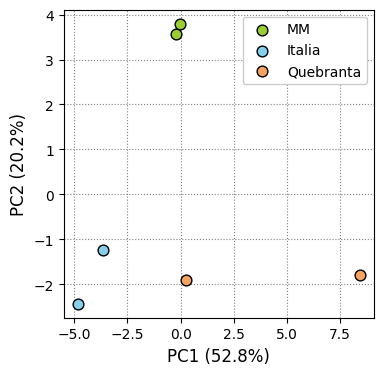

In [1104]:
fig = plt.figure(figsize = (4,4), dpi=100)

ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('PC1 (52.8%)', fontsize = 12, color='k')
ax.set_ylabel('PC2 (20.2%)', fontsize = 12, color='k')
ax.set_title('', fontsize = 16, fontweight='bold', color='k')
ax.set(facecolor = "white")
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dotted')
ax.xaxis.grid(color='gray', linestyle='dotted')

Labels=['MM','Italia','Quebranta']
colors = ['yellowgreen', 'skyblue', 'sandybrown']
for Labels, color in zip(Labels,colors):
    indicesToKeep = finalDf['Label'] == Labels
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 60
               , edgecolors='k'
               , label=str(u))

ax.legend(['MM','Italia','Quebranta'],framealpha=1, frameon=True)